In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1)	Merge the country sheet and Zomato file to get the country code


In [3]:
excel_df = pd.read_excel('Country-Code.xlsx')
csv_df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

merged_df = pd.merge(excel_df, csv_df, on='Country Code')
print(merged_df)

      Country Code        Country  Restaurant ID  \
0                1          India        3400025   
1                1          India        3400341   
2                1          India        3400005   
3                1          India        3400021   
4                1          India        3400017   
...            ...            ...            ...   
9546           216  United States       17697389   
9547           216  United States       17697424   
9548           216  United States       17697332   
9549           216  United States       17694056   
9550           216  United States       17559793   

                               Restaurant Name            City  \
0                                   Jahanpanah            Agra   
1                          Rangrezz Restaurant            Agra   
2                      Time2Eat - Mama Chicken            Agra   
3        Chokho Jeeman Marwari Jain Bhojanalya            Agra   
4                               Pinch Of Spic

## 2)	Get the Top rated restaurants in each city in India(On the basis of rating and votes).


In [4]:
india_df = merged_df[merged_df['Country']=='India']
sorted_india_df = india_df.sort_values(['City','Aggregate rating','Votes'],ascending=[True,False,False])
top_rated_restaurants = sorted_india_df.groupby('City').head(1)
print(top_rated_restaurants[['City', 'Restaurant Name', 'Aggregate rating', 'Votes']])

              City                    Restaurant Name  Aggregate rating  Votes
13            Agra                    Sheroes Hangout               4.9     77
29       Ahmedabad                           Cryo Lab               4.6    166
56       Allahabad                             Eat On               3.7    105
78        Amritsar                    Kesar Da Dhabha               4.1    878
96      Aurangabad                    Bhoj Restaurant               3.7     89
104      Bangalore                               Toit               4.8  10934
124         Bhopal              Sagar Gaire Fast Food               4.9    427
144   Bhubaneshwar                    Barbeque Nation               4.6    154
169     Chandigarh                    Barbeque Nation               4.5   1450
198        Chennai          AB's - Absolute Barbecues               4.9    859
217     Coimbatore                            CakeBee               4.9    200
226       Dehradun               The Great Indian Pu

In [5]:
india_df.City.value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

In [6]:
singapore_df = merged_df[merged_df['Country']=='Singapore']
aus_df = merged_df[merged_df['Country']=='Australia']
braz_df = merged_df[merged_df['Country']=='Brazil']
canada_df = merged_df[merged_df['Country']=='Canada']
UAE_df = merged_df[merged_df['Country']=='UAE']
UK_df = merged_df[merged_df['Country']=='United Kingdom']
US_df = merged_df[merged_df['Country']=='United States']
SA_df = merged_df[merged_df['Country']=='South Africa']
NZ_df = merged_df[merged_df['Country']=='New Zealand']
T_df = merged_df[merged_df['Country']=='Turkey']  
india_df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
singapore_df.City.value_counts()

City
Singapore    20
Name: count, dtype: int64

In [8]:
DelhiTopRes = india_df[(india_df['City']=='New Delhi')&(india_df['Aggregate rating']>4.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [9]:
DelhiTopRes.style.apply(lambda x : ['background : green' if x.name == 'Votes' else 'background : lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
2389,4.900000,Naturals Ice Cream,2620
2977,4.900000,Indian Accent - The Manor,1934
6035,4.600000,The California Boulevard,1691
4015,4.600000,Big Chill,1569
6373,4.700000,Echoes Satyaniketan,1563
7225,4.600000,Cafeteria & Co.,1136
2686,4.600000,Spezia Bistro,1071
6033,4.700000,Naturals Ice Cream,474
3674,4.900000,Masala Library,408
3108,4.600000,Tashan,304


In [10]:
singaporeTopRes = singapore_df[(singapore_df['City']=='Singapore')&(singapore_df['Aggregate rating']>3.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [11]:
singaporeTopRes.style.apply(lambda y : ['background : red' if y.name == 'Votes' else 'background : blue' for i in y])

,Aggregate rating,Restaurant Name,Votes
8847,3.800000,Jaan,35
8850,4.100000,Fratini La Trattoria,35
8861,3.900000,Bitters & Love,35
8856,3.900000,Summer Pavilion,34
8844,4.000000,Cut By Wolfgang Puck,33
8845,3.800000,Restaurant Andre,33
8848,3.900000,Rhubarb Le Restaurant,33
8853,3.700000,Chye Seng Huat Hardware,33
8855,3.800000,Colony,30
8849,4.200000,Al'frank Cookies,29


In [12]:
aus_df.City.value_counts()

City
Hepburn Springs    2
Armidale           1
Macedon            1
Trentham East      1
Tanunda            1
Phillip Island     1
Penola             1
Paynesville        1
Palm Cove          1
Montville          1
Middleton Beach    1
Mayfield           1
Lorn               1
Balingup           1
Lakes Entrance     1
Inverloch          1
Huskisson          1
Forrest            1
Flaxton            1
East Ballina       1
Dicky Beach        1
Beechworth         1
Victor Harbor      1
Name: count, dtype: int64

## 3.Finding out relationship between the rating and votes.


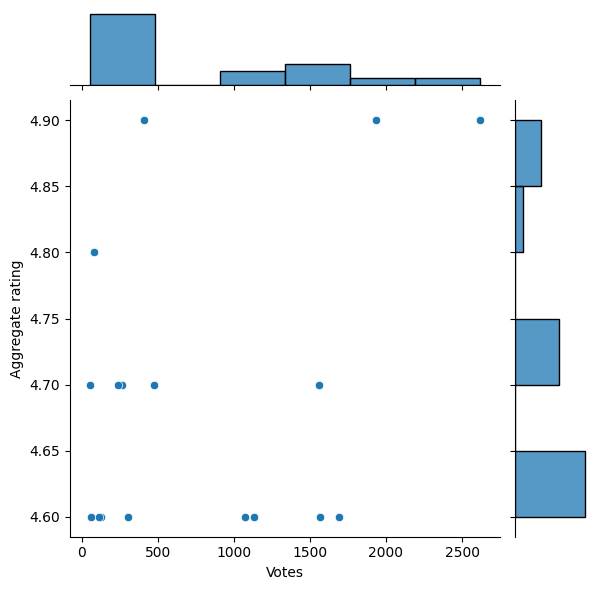

In [13]:
sns.jointplot(x='Votes', y='Aggregate rating', data=DelhiTopRes)

## 4. No of Restaurants in each country.


In [14]:
india = india_df['Restaurant Name'].nunique()
print("India =" ,india)

India = 6604


In [15]:
singapore = singapore_df['Restaurant Name'].nunique()
singapore

20

In [16]:
canada = canada_df['Restaurant Name'].nunique()
canada

4

In [17]:
austraila = aus_df['Restaurant Name'].nunique()
austraila

24

In [18]:
brazil = braz_df['Restaurant Name'].nunique()
brazil

58

In [19]:
uae = UAE_df['Restaurant Name'].nunique()
uae

55

In [20]:
uk = UK_df['Restaurant Name'].nunique()
uk

74

In [21]:
us = US_df['Restaurant Name'].nunique()
us

423

In [22]:
sa = SA_df['Restaurant Name'].nunique()
sa

60

In [23]:
NZ = NZ_df['Restaurant Name'].nunique()
NZ

40

In [24]:
T = T_df['Restaurant Name'].nunique()
T

32

In [25]:
restaurant_counts = merged_df['Country'].value_counts()
print(restaurant_counts)

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


## 5. Top 5 restaurants with online delivery


In [26]:
top_online_delivery = merged_df[merged_df['Has Online delivery'] == 'Yes']
top5_online_delivery = top_online_delivery.sort_values(['Aggregate rating', 'Votes'], ascending=[False, False]).head()
print(top5_online_delivery[['Restaurant Name', 'City', 'Aggregate rating', 'Votes']])

                    Restaurant Name        City  Aggregate rating  Votes
2389             Naturals Ice Cream   New Delhi               4.9   2620
1726  Zolocrust - Hotel Clarks Amer      Jaipur               4.9    322
757                     Caterspoint     Gurgaon               4.9    223
217                         CakeBee  Coimbatore               4.9    200
185                         Chili's     Chennai               4.8   1262


In [27]:
Online_Delivery = india_df[(india_df['City']=='New Delhi')&(india_df['Aggregate rating']>4.5)&(india_df['Has Online delivery'] == 'Yes')][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [28]:
Online_Delivery.style.apply(lambda x : ['background : green' if x.name == 'Votes' else 'background : lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
2389,4.900000,Naturals Ice Cream,2620
2686,4.600000,Spezia Bistro,1071
6033,4.700000,Naturals Ice Cream,474
2390,4.700000,Zabardast Indian Kitchen,242
6556,4.600000,Greenr Cafe,112
5802,4.600000,Food Scouts,61


In [29]:
Online_Delivery_Agra = india_df[(india_df['City']=='Agra')&(india_df['Aggregate rating']>1)&(india_df['Has Online delivery'] == 'Yes')][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [30]:
Online_Delivery_Agra.style.apply(lambda x : ['background : green' if x.name == 'Votes' else 'background : lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes


In [31]:
Online_Delivery_Gurgaon  = india_df[(india_df['City']=='Gurgaon')&(india_df['Aggregate rating']>4.5)&(india_df['Has Online delivery'] == 'Yes')][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [32]:
Online_Delivery_Gurgaon.style.apply(lambda x : ['background : green' if x.name == 'Votes' else 'background : lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
688,4.600000,Twigly,395
757,4.900000,Caterspoint,223
854,4.600000,Dudleys,150


In [33]:
Online_Delivery_Noida  = india_df[(india_df['City']=='Noida')&(india_df['Aggregate rating']>4)&(india_df['Has Online delivery'] == 'Yes')][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [34]:
Online_Delivery_Noida.style.apply(lambda x : ['background : green' if x.name == 'Votes' else 'background : lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
7446,4.100000,Chili's Grill & Bar,750
7448,4.300000,Mamagoto,428
7452,4.200000,The Bento Cafe,316
7844,4.200000,Mad Over Donuts,235
8133,4.300000,Kalpak Restaurant & Cafe,150
8132,4.100000,Biryani By Kilo,126
7882,4.100000,Wakhra Swaad,112
7475,4.100000,Laat Saab,111
7978,4.300000,Desi Swag,96
8044,4.100000,Salato Salad Studio,43


In [35]:
cities_with_online_delivery = india_df[india_df['Has Online delivery'] == 'Yes']['City'].unique()
print(cities_with_online_delivery)

['Ahmedabad' 'Bangalore' 'Chandigarh' 'Chennai' 'Coimbatore' 'Faridabad'
 'Ghaziabad' 'Gurgaon' 'Hyderabad' 'Jaipur' 'Kochi' 'Kolkata' 'Mohali'
 'Mumbai' 'Nagpur' 'New Delhi' 'Noida' 'Pune' 'Secunderabad']


## 6. Cheap but best restaurants available in a city


In [36]:
cheap= india_df[(india_df['City']=='New Delhi')&(india_df['Aggregate rating']>4.5)&(india_df['Votes']>400)][['Average Cost for two','Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=True,by='Average Cost for two')

In [37]:
cheap.style.apply(lambda x : ['background : green' if x.name == 'Votes' else 'background : lightsteelblue' for i in x])

,Average Cost for two,Aggregate rating,Restaurant Name,Votes
2389,150,4.900000,Naturals Ice Cream,2620
6033,150,4.700000,Naturals Ice Cream,474
6373,600,4.700000,Echoes Satyaniketan,1563
2686,900,4.600000,Spezia Bistro,1071
7225,900,4.600000,Cafeteria & Co.,1136
4015,1500,4.600000,Big Chill,1569
6035,2000,4.600000,The California Boulevard,1691
2977,4000,4.900000,Indian Accent - The Manor,1934
3674,5000,4.900000,Masala Library,408


## 7. Top cuisines in each region.


In [38]:
from collections import Counter
def top_cuisines_by_city(df):
    result = []
    for city, group in df.groupby('City'):
        cuisines = group['Cuisines'].dropna().str.split(', ')
        cuisine_list = [cuisine for sublist in cuisines for cuisine in sublist]
        if cuisine_list:
            most_common = Counter(cuisine_list).most_common(1)[0][0]
            result.append({'City': city, 'Top Cuisine': most_common})
    return pd.DataFrame(result)

top_cuisines_df = top_cuisines_by_city(india_df)
print(top_cuisines_df)

            City   Top Cuisine
0           Agra  North Indian
1      Ahmedabad   Continental
2      Allahabad  North Indian
3       Amritsar  North Indian
4     Aurangabad  North Indian
5      Bangalore  North Indian
6         Bhopal     Fast Food
7   Bhubaneshwar       Chinese
8     Chandigarh  North Indian
9        Chennai  North Indian
10    Coimbatore  North Indian
11      Dehradun  North Indian
12     Faridabad  North Indian
13     Ghaziabad  North Indian
14           Goa       Seafood
15       Gurgaon  North Indian
16      Guwahati       Chinese
17     Hyderabad  North Indian
18        Indore  North Indian
19        Jaipur   Continental
20        Kanpur  North Indian
21         Kochi        Kerala
22       Kolkata  North Indian
23       Lucknow          Cafe
24      Ludhiana  North Indian
25     Mangalore  North Indian
26        Mohali   Continental
27        Mumbai       Italian
28        Mysore  North Indian
29        Nagpur       Chinese
30        Nashik  North Indian
31     N

In [39]:
IndianCuisins = merged_df[merged_df['Country']=='India']

## 8. Aggregate rating of all the restaurants in each city in a country.


In [40]:
tables = pd.pivot_table(data = merged_df, index=('Country','City'), values="Aggregate rating")

In [51]:
cm = sns.color_palette("mako", as_cmap=True)
tables.style.background_gradient(cmap = cm,axis=0)

## 9. Does rating influences the cost of restaurant? (Draw boxplot for this).

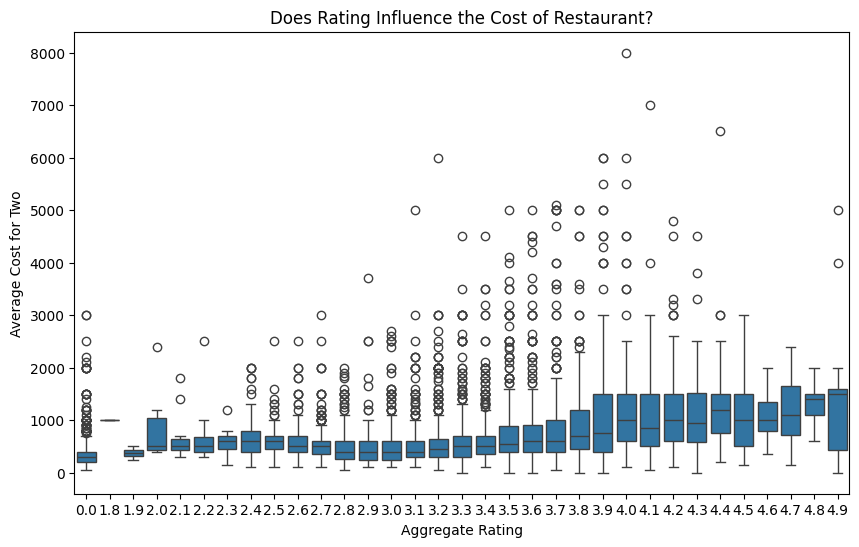

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Aggregate rating', y='Average Cost for two', data=india_df)
plt.title('Does Rating Influence the Cost of Restaurant?')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for Two')
plt.show()

<Axes: ylabel='Average Cost for two'>

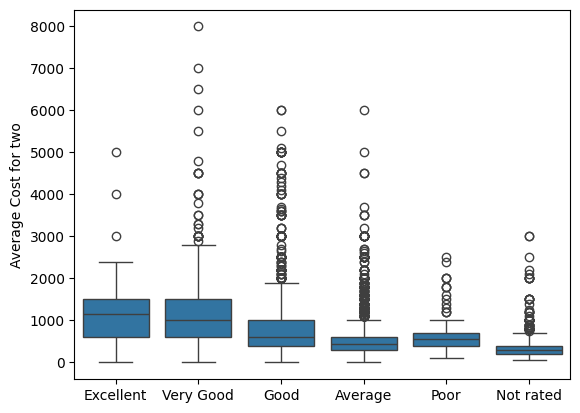

In [58]:
avg_cost_for_india = india_df['Average Cost for two']
aggrating_of_india = pd.Categorical(values=india_df['Rating text'],categories=['Excellent','Very Good','Good','Average','Poor','Not rated'], ordered=True)
sns.boxplot(x=aggrating_of_india, y=avg_cost_for_india)

## 10. Top Percentage cover of restaurants in a city.(Draw pie graph for this).


<Axes: ylabel='count'>

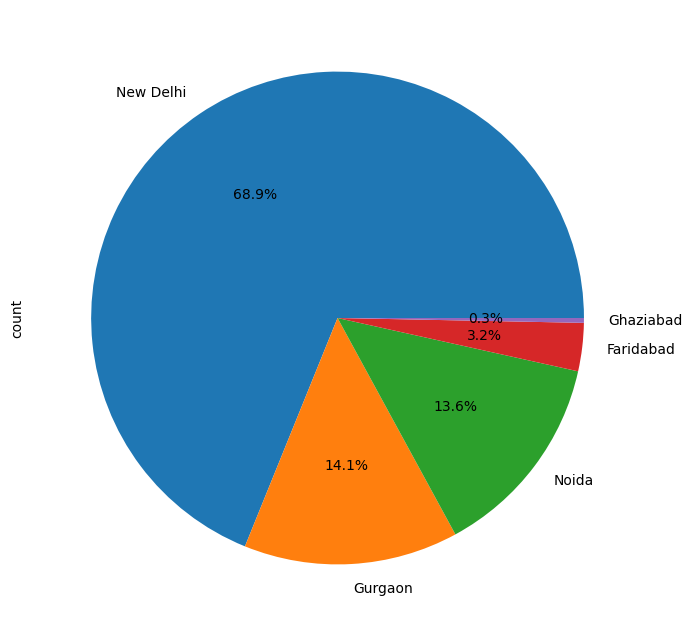

In [64]:
plt.figure(figsize=(10, 8))
india_df['City'].value_counts().head().plot(kind='pie', autopct = '%1.1f%%')


## 11. Top cuisines in Indian restaurants.( Draw pie graph for this)

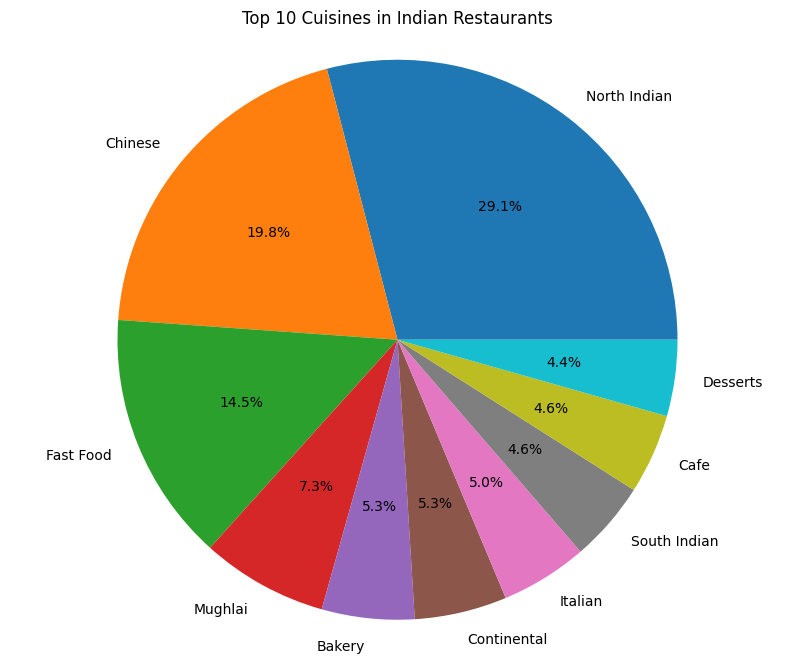

In [67]:
from collections import Counter

all_cuisines = india_df['Cuisines'].dropna().str.split(', ')
cuisine_list = [cuisine for sublist in all_cuisines for cuisine in sublist]

top_cuisines = Counter(cuisine_list).most_common(10)
labels, sizes = zip(*top_cuisines)

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Cuisines in Indian Restaurants')
plt.axis('equal')
plt.show()